# Учење без надзор(кластерирање)
Кластерирање претставува метода на учење без надзор која има за цел да да го раздели податочното множество на групи од слични податоци. За разлика од моделите на учење со надзор каде се искористуваше влезна величина(карактеристиките на множеството) и излезна величина(величината која се предвидува), кластерирањето има потреба само од влезна величина каде на излез ја дава припадноста на соодветниот кластер кај секој влезен податок. Постојат повеќе алгоритми за кластерирање како:
* KMeans
* DBSCAN
* Agglomerative Hierarchical Clustering
* Expectation–Maximization (EM) Clustering
* Mean Shift Clustering

каде повеќето искористуваат различни пристапи на кластерирање. Еден од нај познатите алгоритми на кластерирање е KMeans, но не може да се каже исто така и е дека е најдобар. Алгоритмот го искористува евклидовото растојание помеѓу точките со цел да најде соодветна група од точки кој што би припаѓала на еден кластер. Покрај евклидовото растојание може да се применува и други типови на растојанија кои често даваат и подобри резултати.

## Вчитување на библиотеки

In [2]:
import numpy as np
from sklearn import datasets
from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

## Дефинирање на вештачки податочни множества за работа

Ќе дефинираме 5 различни податочни множества на кои ќе тестираме алгоритми за кластерирање:
1. Множество од точки распределени на концентрични кружници
2. Множество од точки распределени на преклопувачки полумесечини
3. Симетрични раздвојливи групи на точки
4. Униформно распределени точки 
5. Анизотропни раздвојливи групи на точки
6. Симетрични раздвојливи групи на точки со различна густина

In [4]:
n_samples = 1500
random_state = 100

noisy_circles = datasets.make_circles(n_samples=n_samples, factor= 0.5, noise=0.05)

noisy_circles = datasets.make_circles(n_samples=n_samples, 
                                      factor=.5,
                                      noise=.05)

noisy_moons = datasets.make_moons(n_samples=n_samples, 
                                  noise=.05)

blobs = datasets.make_blobs(n_samples=n_samples, 
                            random_state=random_state)

no_structure = np.random.rand(n_samples, 2), None

# Anisotropicly distributed data
X, y = datasets.make_blobs(n_samples=n_samples, 
                           random_state=random_state)
transformation = [[0.6, -0.6], 
                  [-0.4, 0.8]]
X_aniso = np.dot(X, transformation)
aniso = (X_aniso, y)

# blobs with varied variances
varied = datasets.make_blobs(n_samples=n_samples,
                             cluster_std=[1.0, 2.5, 0.5],
                             random_state=random_state)


##  Визуелизација на податочните множества

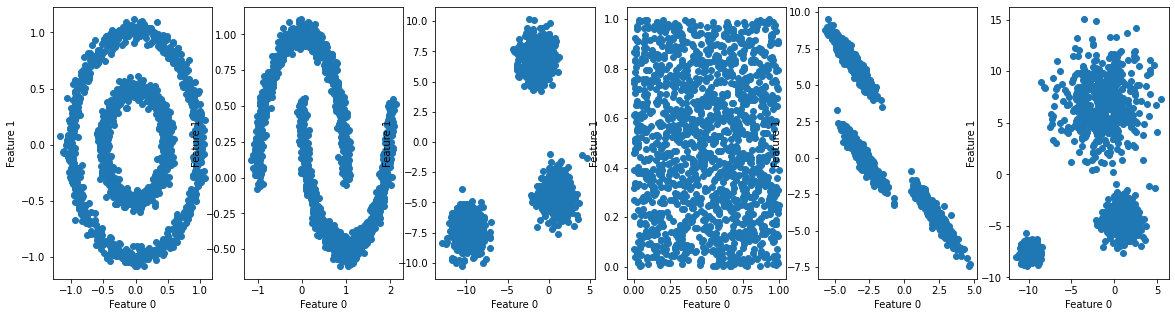

In [6]:
datsets = {'circles': noisy_circles,'moons': noisy_moons,'blobs': blobs,'uniform': no_structure,'aniso': aniso,'varied': varied}
plot_nr = 1
plt.figure(figsize=(20, 5))
for key in datsets:
    X, y = datsets[key]
    plt.subplot(1, len(datsets), plot_nr)
    plt.scatter(X[:, 0], X[:, 1])
    plt.xlabel('Feature 0')
    plt.ylabel('Feature 1')
    plot_nr += 1

# KMeans - кластерирање според точки на рамнотежа
KMeans алгоритмот применува пристап на оптимално поставување на точки на рамнотежа каде секоја податочна точка припаѓа на соодветен кластер според растојанието од точките на рамнотежа. Алгоритмот е итеративен и има неконвексна функција на цена. Работи на принципот на предходно иницијализирање на точки на рамнотежа кои тежнее да ги приближи кон соодветната група на точки која може да се карактеризира како еден кластер. За жал алгоритмот тежнее да бара кластери дури и кога множество е униформно.Поради тоа што функцијата на цена е неконвексна многу често алгоритмот тежнее да конвергира во локален минимум. Според тоа потребно е да се користи соодветни методи за иницијализација како KMeans++. Неговите предности и недостатоци можат да се сублимираат со следната табела:

|Предности|Недостатоци|
|---|---|
|Едноставен за имплементација|Бројот на кластер мора однапред да се определи|
|Може да се применува за големи податочни множества|Решението зависи од инцијализацијата на алгоритмот(неконвексна функција на цена)|
|Наоѓа кластери дури и кога нивното постоење не е очигледно(во некои случаи ова е недостаток)|Потфрлува кај множества со многу шум(outliers)|
|Паралелизација на алгоритмот за извршување на повеќе процесори|Потфрлува да најде кластери кои имаат специфична форма|
## Утврдување на број на кластери според elbow method
Бидејќи KMeans побарува однапред да биде дефиниран бројот на кластери, тука ќе претпоставиме дека овој параметар не го знаеме и ќе го примениме методот на прекршочна точка.

In [7]:
def multiple_datasets(func):
    def execution_function(datsets, plot=False):
        if plot==True:
            plt.figure(figsize=(30, 10))
            plot_nr = 1
        for key in datsets:
            if plot==True:
                plt.subplot(1, len(datsets), plot_nr)
                plot_nr += 1
                
            func(key, datsets[key])
    return execution_function

In [8]:
@multiple_datasets
def kmeans_elbow_method(name, datset):
    max_nr_clusters = 15
    X, y = datset
    cost_func = []
    for nr_clusters in range(1, max_nr_clusters + 1):
        scaler = StandardScaler()
        kmeans = KMeans(n_clusters=nr_clusters, init='random', n_init=5)
        kmeans.fit(scaler.fit_transform(X))
        cost_func.append(kmeans.inertia_)

    plt.plot(range(1, 16), cost_func)
    plt.xlabel('number of clusters')
    plt.ylabel('Distortion')
    plt.xticks(range(1, 16))
    plt.grid()

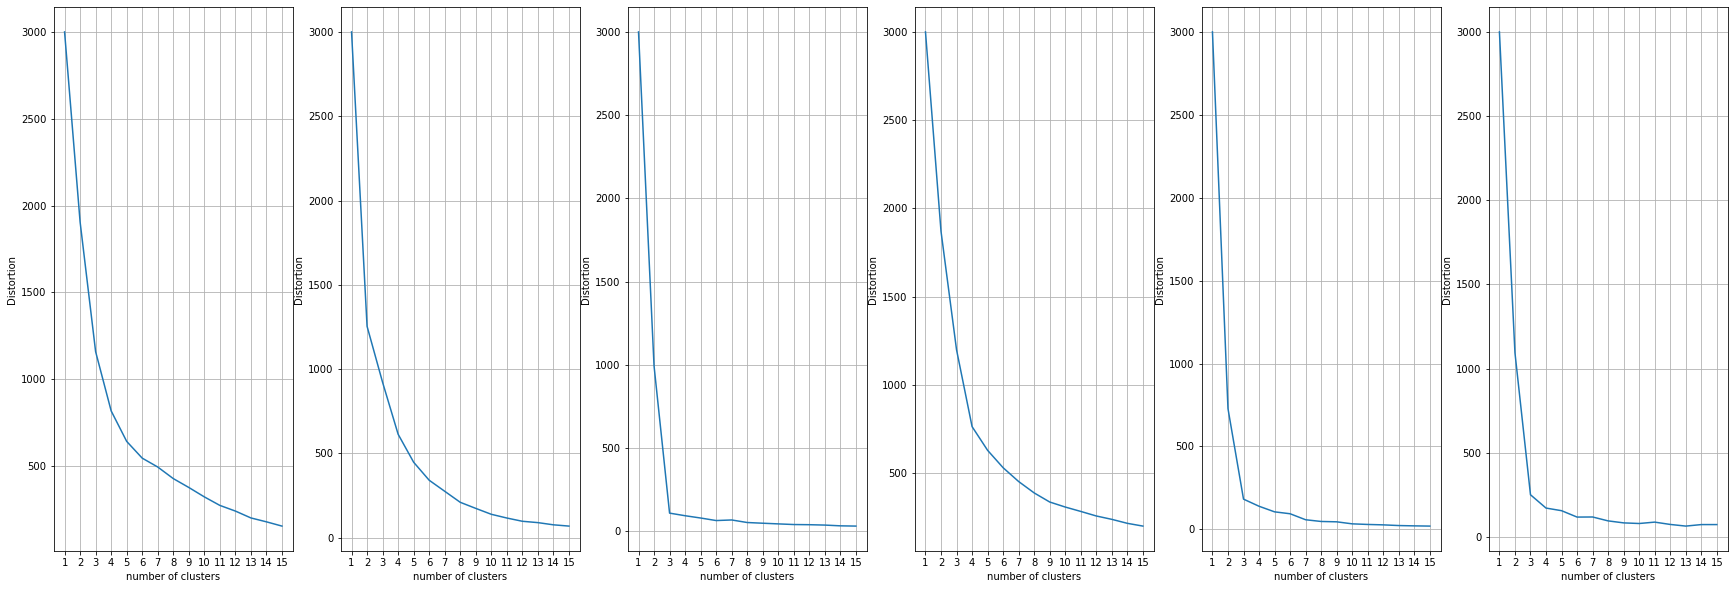

In [9]:
kmeans_elbow_method(datsets, plot=True)

Од графиците можеме да забележиме дека некои множества немаат „очигледна“ прекршочна точка и од тука може да се забележи еден од недостатоците на овој алгоритам. Поради специфичната форма на некои кластери во податочните множества, методата на утврдување на прекршочна точка не помага во дефинирање на параметарот за број на кластери. Поради тоа, кај вакви множества, доколку предходно не е познат бројот на кластер, оваа метода не е апликативна.

Од друга страна, кај оние множества кои имаат очигледно раздвојливи групи на податочни точки со свои точки на рамнотежа, бројот на кластери може многу лесно да се дефинира бидејќи прекршочната точка е очигледна во графикот.

Од тука ќе ги дефинираме следните параметри за бројот на кластери од секое податочно множество:

In [10]:
nrs_clusters = {'circles': 3, 'moons': 3, 'blobs': 3, 'uniform': 4, 'aniso': 3, 'varied': 3}

In [11]:
@multiple_datasets
def kmeans_viz(name, datset):
    X, y = datset
    scaler = StandardScaler()
    kmeans = KMeans(n_clusters=nrs_clusters[name], 
                    init='random', 
                    n_init=5)
    
    
    y_pred = kmeans.fit_predict(scaler.fit_transform(X))
    plt.scatter(X[:, 0], X[:, 1], c=y_pred)
    
    
    plt.xlabel('Feature 0')
    plt.ylabel('Feature 1')

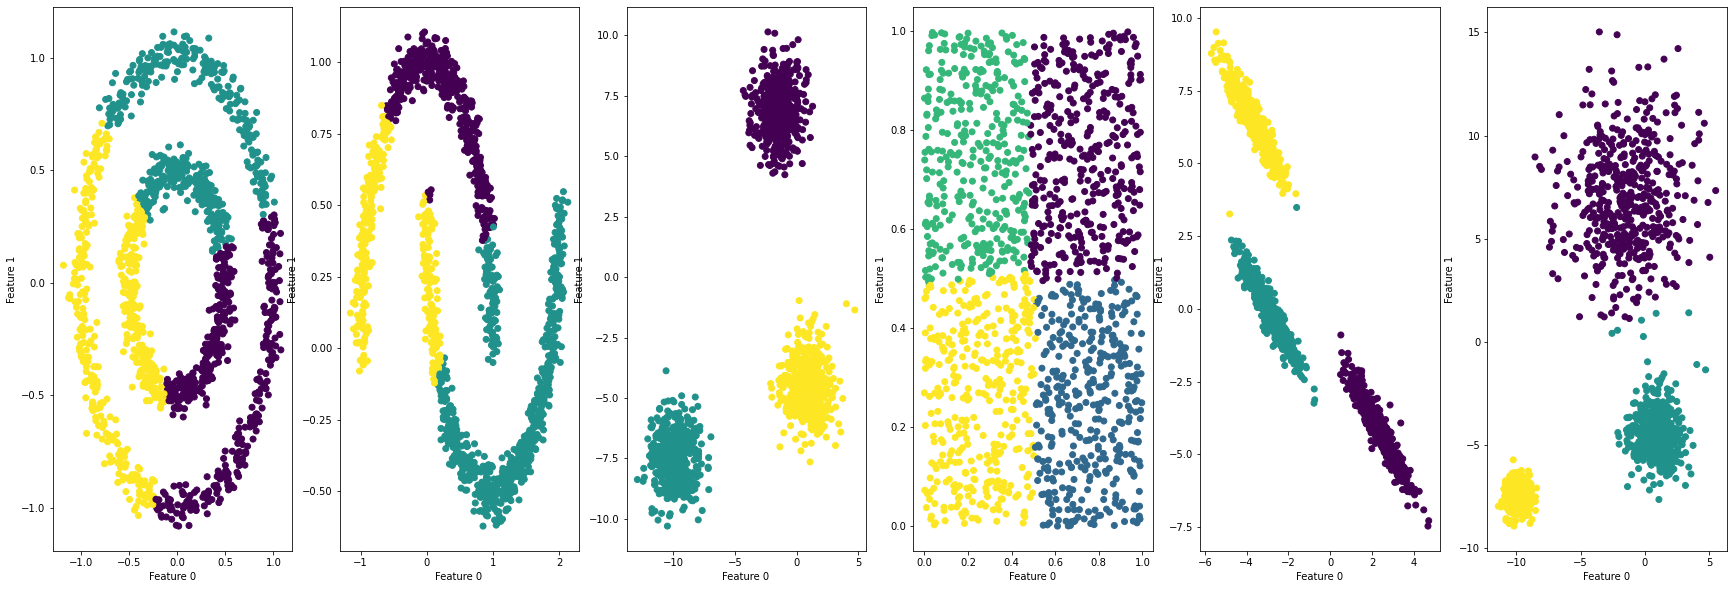

In [12]:
kmeans_viz(datsets, plot=True)

Од резултатите може да се заклучи дека KMeans  потфрлува кај податочни множества чии графици од методата на прекршочна точка се двосмислена. Имено, KMeans во вакви случаи потфрлува да ги најде вистинските кластери. Понатамошно, може да се увиди дека методата тежнее да најде кластери дури и кога тие не постојат, како во примерота на униформното податочно множество.

# DBSCAN
DBSCAN претставува алгоритам на кластерирање кој ја користи густината помеѓу точките за да најде соодветен кластер. Ова го применува на тој начин така што предходно корисникот дефинира радиус на кружница(eps) и минимален број на точки(min_samples) за да може истите да дефинираат припадност на еден кластер. За разлика од KMeans  тој не побарува предходно дефинирање на бројот на кластери и неговите предности и недостатоци може да се сумираат во следната табела:

|Предности|Недостатоци|
|---|---|
|Не е потребно предходно определување на бројот на кластери|Невозможна е паралелизација на алгоритмот за работа на повеќе процесори|
|Може да наоѓа кластери со специфични форми|Повеќе параметри за нагодување|
|Робусен во случаи на шум(outliers)|Лоши резултати во случаи на лошо нагодени параметри|
||Потфрлува да најде кластери кога различни групи на податочни точки имаат променлива густина|

In [17]:
@multiple_datasets
def DBSCAN_viz(name, datset):
    X, y = datset
    scaler = StandardScaler()
    dbscan = DBSCAN(eps=0.3, 
                    min_samples=10)
    
    y_pred = dbscan.fit_predict(scaler.fit_transform(X))
    plt.scatter(X[:, 0], X[:, 1], c=y_pred)
    
    
    plt.xlabel('Feature 0')
    plt.ylabel('Feature 1')

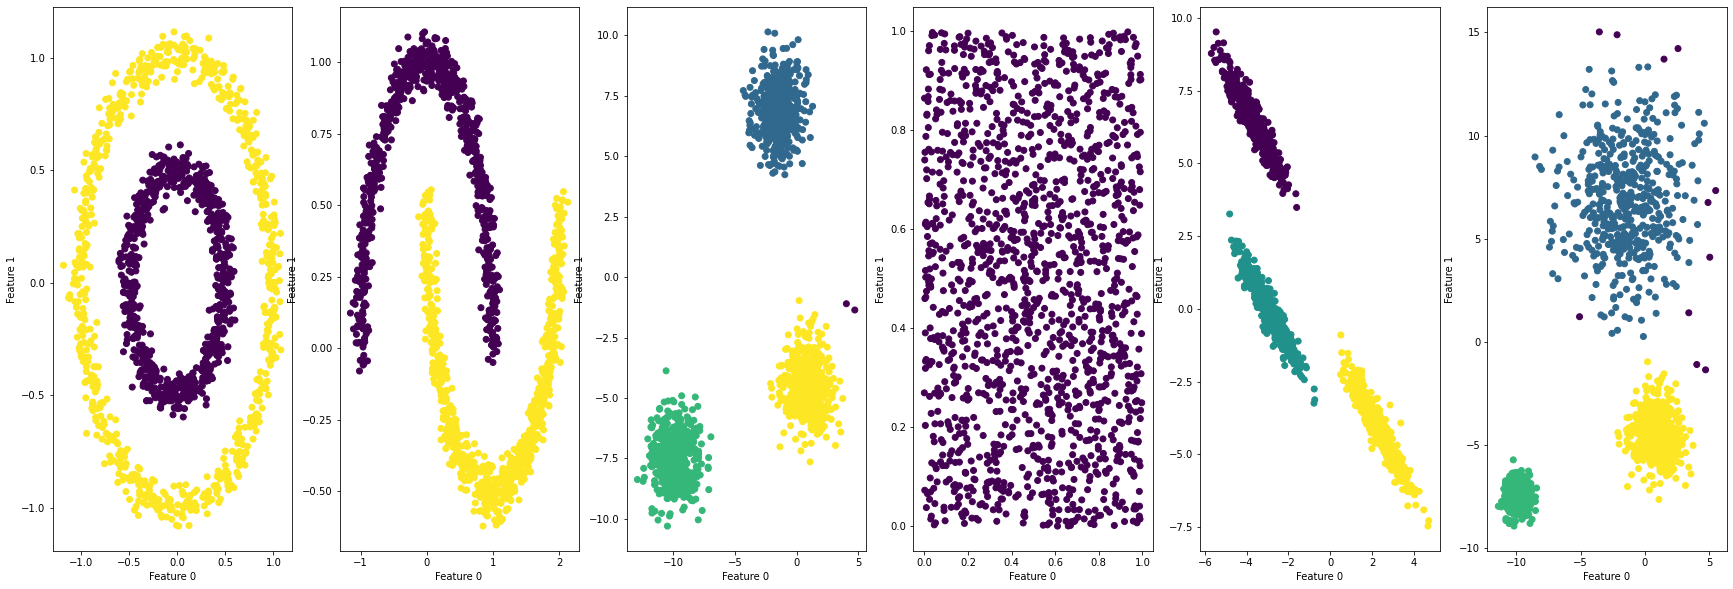

In [18]:
DBSCAN_viz(datsets, plot=True)

Обидете се да го тестирате алгоритмот за следниве вредности на параметрите и оценете ја неговата работа во вакви случаи {eps, min_samples}:
* {0.1, 10}
* {0.5, 10}
* {1, 10}
* {0.3, 2}
* {0.3, 100}

Поради сензитивноста на резултатите на алгоритмот во зависност од неговите параметри, примената на овој алгоритам секогаш мора да биде поткрепена со добро познавање на податочното множество врз кое се имплементира.

# Кластерирање на метеоролошки станици според климатски карактеристики
Во оваа вежба се ќе искористиме податочно множество од метеоролошки станици заедно со некои карактеристики изведени од нивните мерење на територијата на Канада. Кластерирањето ќе направиме според климата, а потоа географски ќе ги визуелизираме станиците за да ја процениме постапката. За оваа вежба ќе ви бидат потребни следните библиотеки:
1. wget -> (conda install -c conda-forge python-wget)
2. cartopy -> (conda install -c conda-forge cartopy)
3. PIL -> (conda install -c anaconda pillow)

Станиците ќе бидат прикажани на исцртана мапа за таа намена ќе го искористиме Cartopy дополнителната алатка за matplotlib.

Информации за податочното множество:
<h4 align = "center">
Environment Canada    
Monthly Values for July - 2015	
</h4>
<html>
<head>
<style>
table {
    font-family: arial, sans-serif;
    border-collapse: collapse;
    width: 100%;
}

td, th {
    border: 1px solid #dddddd;
    text-align: left;
    padding: 8px;
}

tr:nth-child(even) {
    background-color: #dddddd;
}
</style>
</head>
<body>

<table>
  <tr>
    <th>Name in the table</th>
    <th>Meaning</th>
  </tr>
  <tr>
    <td><font color = "green"><strong>Stn_Name</font></td>
    <td><font color = "green"><strong>Station Name</font</td>
  </tr>
  <tr>
    <td><font color = "green"><strong>Lat</font></td>
    <td><font color = "green"><strong>Latitude (North+, degrees)</font></td>
  </tr>
  <tr>
    <td><font color = "green"><strong>Long</font></td>
    <td><font color = "green"><strong>Longitude (West - , degrees)</font></td>
  </tr>
  <tr>
    <td>Prov</td>
    <td>Province</td>
  </tr>
  <tr>
    <td>Tm</td>
    <td>Mean Temperature (°C)</td>
  </tr>
  <tr>
    <td>DwTm</td>
    <td>Days without Valid Mean Temperature</td>
  </tr>
  <tr>
    <td>D</td>
    <td>Mean Temperature difference from Normal (1981-2010) (°C)</td>
  </tr>
  <tr>
    <td><font color = "black">Tx</font></td>
    <td><font color = "black">Highest Monthly Maximum Temperature (°C)</font></td>
  </tr>
  <tr>
    <td>DwTx</td>
    <td>Days without Valid Maximum Temperature</td>
  </tr>
  <tr>
    <td><font color = "black">Tn</font></td>
    <td><font color = "black">Lowest Monthly Minimum Temperature (°C)</font></td>
  </tr>
  <tr>
    <td>DwTn</td>
    <td>Days without Valid Minimum Temperature</td>
  </tr>
  <tr>
    <td>S</td>
    <td>Snowfall (cm)</td>
  </tr>
  <tr>
    <td>DwS</td>
    <td>Days without Valid Snowfall</td>
  </tr>
  <tr>
    <td>S%N</td>
    <td>Percent of Normal (1981-2010) Snowfall</td>
  </tr>
  <tr>
    <td><font color = "green"><strong>P</font></td>
    <td><font color = "green"><strong>Total Precipitation (mm)</font></td>
  </tr>
  <tr>
    <td>DwP</td>
    <td>Days without Valid Precipitation</td>
  </tr>
  <tr>
    <td>P%N</td>
    <td>Percent of Normal (1981-2010) Precipitation</td>
  </tr>
  <tr>
    <td>S_G</td>
    <td>Snow on the ground at the end of the month (cm)</td>
  </tr>
  <tr>
    <td>Pd</td>
    <td>Number of days with Precipitation 1.0 mm or more</td>
  </tr>
  <tr>
    <td>BS</td>
    <td>Bright Sunshine (hours)</td>
  </tr>
  <tr>
    <td>DwBS</td>
    <td>Days without Valid Bright Sunshine</td>
  </tr>
  <tr>
    <td>BS%</td>
    <td>Percent of Normal (1981-2010) Bright Sunshine</td>
  </tr>
  <tr>
    <td>HDD</td>
    <td>Degree Days below 18 °C</td>
  </tr>
  <tr>
    <td>CDD</td>
    <td>Degree Days above 18 °C</td>
  </tr>
  <tr>
    <td>Stn_No</td>
    <td>Climate station identifier (first 3 digits indicate   drainage basin, last 4 characters are for sorting alphabetically).</td>
  </tr>
  <tr>
    <td>NA</td>
    <td>Not Available</td>
  </tr>


</table>

</body>
</html>

In [279]:
import wget
import cartopy.crs as ccrs
import cartopy
from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import pandas as pd

In [280]:
wget.download('https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/weather-stations20140101-20141231.csv')

100% [............................................................................] 129821 / 129821

'weather-stations20140101-20141231 (2).csv'

In [281]:
data = pd.read_csv('weather-stations20140101-20141231.csv')

In [282]:
data.head()

,Stn_Name,Lat,Long,Prov,Tm,DwTm,D,Tx,DwTx,Tn,...,DwP,P%N,S_G,Pd,BS,DwBS,BS%,HDD,CDD,Stn_No
0,CHEMAINUS,48.935,-123.742,BC,8.2,0.0,NaN,13.5,0.0,1.0,...,0.0,NaN,0.0,12.0,NaN,NaN,NaN,273.3,0.0,1011500
1,COWICHAN LAKE FORESTRY,48.824,-124.133,BC,7.0,0.0,3.0,15.0,0.0,-3.0,...,0.0,104.0,0.0,12.0,NaN,NaN,NaN,307.0,0.0,1012040
2,LAKE COWICHAN,48.829,-124.052,BC,6.8,13.0,2.8,16.0,9.0,-2.5,...,9.0,NaN,NaN,11.0,NaN,NaN,NaN,168.1,0.0,1012055
3,DISCOVERY ISLAND,48.425,-123.226,BC,NaN,NaN,NaN,12.5,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1012475
4,DUNCAN KELVIN CREEK,48.735,-123.728,BC,7.7,2.0,3.4,14.5,2.0,-1.0,...,2.0,NaN,NaN,11.0,NaN,NaN,NaN,267.7,0.0,1012573


In [283]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1341 entries, 0 to 1340
Data columns (total 25 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Stn_Name  1341 non-null   object 
 1   Lat       1341 non-null   float64
 2   Long      1341 non-null   float64
 3   Prov      1341 non-null   object 
 4   Tm        1256 non-null   float64
 5   DwTm      1256 non-null   float64
 6   D         357 non-null    float64
 7   Tx        1260 non-null   float64
 8   DwTx      1260 non-null   float64
 9   Tn        1260 non-null   float64
 10  DwTn      1260 non-null   float64
 11  S         586 non-null    float64
 12  DwS       586 non-null    float64
 13  S%N       198 non-null    float64
 14  P         1227 non-null   float64
 15  DwP       1227 non-null   float64
 16  P%N       209 non-null    float64
 17  S_G       798 non-null    float64
 18  Pd        1227 non-null   float64
 19  BS        0 non-null      float64
 20  DwBS      0 non-null      floa

In [284]:
data.describe()

,Lat,Long,Tm,DwTm,D,Tx,DwTx,Tn,DwTn,S,...,P,DwP,P%N,S_G,Pd,BS,DwBS,BS%,HDD,CDD
count,1341.000000,1341.000000,1256.000000,1256.000000,357.000000,1260.000000,1260.000000,1260.000000,1260.000000,586.000000,...,1227.000000,1227.000000,209.000000,798.000000,1227.000000,0.0,0.0,0.0,1256.000000,1256.0
mean,51.185221,-96.670827,-12.062341,2.186306,-2.768908,2.612302,1.814286,-26.322381,1.816667,35.219966,...,50.402363,2.612062,118.368421,31.325815,7.480033,NaN,NaN,NaN,773.277150,0.0
std,6.216434,23.285512,10.416366,4.903077,4.840769,8.855823,4.249613,12.573066,4.438321,39.575586,...,62.312551,4.889425,64.527522,33.799751,4.740601,NaN,NaN,NaN,311.119277,0.0
min,41.949000,-140.868000,-38.200000,0.000000,-12.000000,-29.800000,0.000000,-49.700000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,26.000000,0.0
25%,46.983000,-116.501000,-18.500000,0.000000,-7.100000,-3.500000,0.000000,-35.425000,0.000000,9.000000,...,13.200000,0.000000,75.000000,2.000000,4.000000,NaN,NaN,NaN,560.100000,0.0
50%,49.850000,-101.400000,-13.800000,0.000000,-4.600000,2.500000,0.000000,-29.100000,0.000000,25.000000,...,27.100000,0.000000,104.000000,26.000000,7.000000,NaN,NaN,NaN,813.500000,0.0
75%,53.283000,-73.750000,-5.600000,2.000000,2.700000,10.000000,1.000000,-21.700000,1.000000,49.875000,...,60.500000,3.000000,147.000000,45.000000,11.000000,NaN,NaN,NaN,988.000000,0.0
max,82.500000,-52.753000,9.600000,27.000000,7.800000,22.000000,27.000000,5.300000,27.000000,245.000000,...,516.800000,27.000000,400.000000,253.000000,28.000000,NaN,NaN,NaN,1523.400000,0.0


Отстранување на NaN.

In [285]:
data.drop(columns=['BS', 'DwBS', 'BS%', 'D', 'S', 'DwS', 'S%N', 'P%N', 'S_G'], inplace=True)
data.dropna(axis='rows', inplace=True)

In [286]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1143 entries, 0 to 1340
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Stn_Name  1143 non-null   object 
 1   Lat       1143 non-null   float64
 2   Long      1143 non-null   float64
 3   Prov      1143 non-null   object 
 4   Tm        1143 non-null   float64
 5   DwTm      1143 non-null   float64
 6   Tx        1143 non-null   float64
 7   DwTx      1143 non-null   float64
 8   Tn        1143 non-null   float64
 9   DwTn      1143 non-null   float64
 10  P         1143 non-null   float64
 11  DwP       1143 non-null   float64
 12  Pd        1143 non-null   float64
 13  HDD       1143 non-null   float64
 14  CDD       1143 non-null   float64
 15  Stn_No    1143 non-null   object 
dtypes: float64(13), object(3)
memory usage: 151.8+ KB


In [287]:
data.describe()

,Lat,Long,Tm,DwTm,Tx,DwTx,Tn,DwTn,P,DwP,Pd,HDD,CDD
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.0
mean,50.950539,-97.471895,-11.535696,2.270341,3.082677,1.846019,-25.880490,1.834646,50.091426,2.524934,7.446194,757.104549,0.0
std,5.757043,23.136281,10.328233,4.964097,8.684320,4.208333,12.654909,4.314045,62.909236,4.666180,4.762158,309.067992,0.0
min,42.043000,-140.868000,-36.400000,0.000000,-28.900000,0.000000,-49.700000,0.000000,0.000000,0.000000,0.000000,26.000000,0.0
25%,46.942000,-117.165000,-17.800000,0.000000,-3.400000,0.000000,-35.000000,0.000000,13.000000,0.000000,4.000000,528.250000,0.0
50%,49.872000,-104.008000,-13.400000,0.000000,3.300000,0.000000,-29.000000,0.000000,26.400000,0.000000,7.000000,797.200000,0.0
75%,53.162500,-74.311000,-4.800000,2.000000,10.350000,1.000000,-21.000000,1.000000,59.650000,3.000000,11.000000,966.400000,0.0
max,82.500000,-52.753000,9.500000,27.000000,22.000000,27.000000,5.300000,27.000000,516.800000,27.000000,28.000000,1523.400000,0.0


In [288]:
coords = data[['Long', 'Lat']]

Ќе ги отстраниме сите колони кои не се поврзани со климата

In [289]:
data.drop(columns=['Long', 'Lat', 'Stn_No', 'Stn_Name', 'Prov'], inplace=True)
data.head()

,Tm,DwTm,Tx,DwTx,Tn,DwTn,P,DwP,Pd,HDD,CDD
0,8.2,0.0,13.5,0.0,1.0,0.0,178.8,0.0,12.0,273.3,0.0
1,7.0,0.0,15.0,0.0,-3.0,0.0,258.6,0.0,12.0,307.0,0.0
2,6.8,13.0,16.0,9.0,-2.5,9.0,264.6,9.0,11.0,168.1,0.0
4,7.7,2.0,14.5,2.0,-1.0,2.0,168.4,2.0,11.0,267.7,0.0
5,8.8,0.0,13.1,0.0,1.9,0.0,81.0,8.0,12.0,258.6,0.0


## Географска распределба на станиците

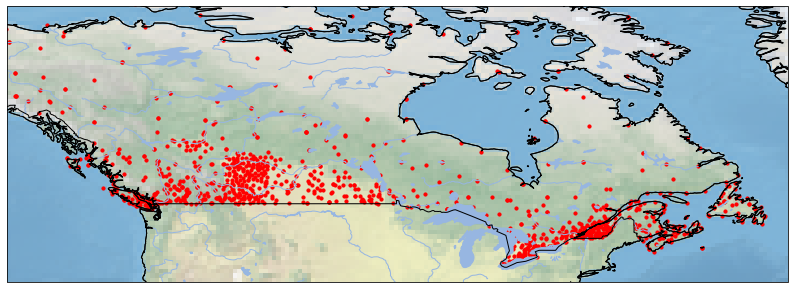

In [290]:
extent = [-140, -50, 40, 65]

plt.figure(figsize=(14, 10))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()
ax.stock_img()
ax.set_extent(extent)
ax.add_feature(cartopy.feature.LAND)
ax.add_feature(cartopy.feature.OCEAN)
ax.add_feature(cartopy.feature.COASTLINE)
ax.add_feature(cartopy.feature.LAKES)
ax.add_feature(cartopy.feature.RIVERS)
ax.add_feature(cartopy.feature.BORDERS)
ax.scatter(coords['Long'], coords['Lat'], transform=ccrs.PlateCarree(), color='r', s=10)
plt.show()

# Кластерирање (KMeans)

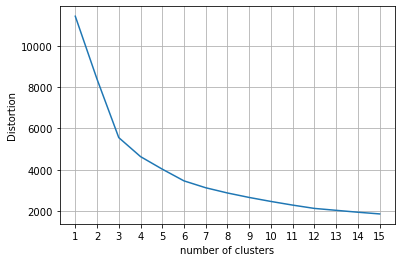

In [291]:
max_nr_clusters = 15
cost_func = []
for nr_clusters in range(1, max_nr_clusters + 1):
    scaler = StandardScaler()
    kmeans = KMeans(n_clusters=nr_clusters, init='k-means++', n_init=20)
    kmeans.fit(scaler.fit_transform(data))
    cost_func.append(kmeans.inertia_)

plt.plot(range(1, max_nr_clusters + 1), cost_func)
plt.xlabel('number of clusters')
plt.ylabel('Distortion')
plt.xticks(range(1,  max_nr_clusters + 1))
plt.grid()

Според графикот можеме да одбере три или шест кластери

In [306]:
scaler = StandardScaler()
kmeans = KMeans(n_clusters=3, init='k-means++', n_init=20)
y_pred = kmeans.fit_predict(scaler.fit_transform(data))

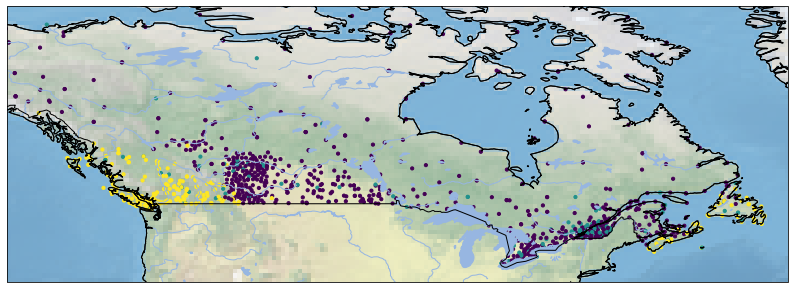

In [307]:
extent = [-140, -50, 40, 65]

plt.figure(figsize=(14, 10))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()
ax.stock_img()
ax.set_extent(extent)
ax.add_feature(cartopy.feature.LAND)
ax.add_feature(cartopy.feature.OCEAN)
ax.add_feature(cartopy.feature.COASTLINE)
ax.add_feature(cartopy.feature.LAKES)
ax.add_feature(cartopy.feature.RIVERS)
ax.add_feature(cartopy.feature.BORDERS)
ax.scatter(coords['Long'], coords['Lat'], transform=ccrs.PlateCarree(), c=y_pred, s=10)
plt.show()

Доколку се игнорираат станиците во северниот дел на државата, може да се забележи дека кластерирањето според климатските карактеристики доведува до кластери кои се распределени според блискоста до океан. Сепак, поради двосмисленоста на графикот на прекршочна точкa, со добро нагодени параметри DBSCAN може би би била подобра опција.